# Saving and loading surfaces
In this notebook we will save a surface to disk and reload it from there using [vedo](https://vedo.embl.es/).

See also
* https://vedo.embl.es/docs/vedo/io.html#write
* https://vedo.embl.es/docs/vedo/io.html#load

In [1]:
import napari_process_points_and_surfaces as nppas
import vedo

from branchoid import branchoid

Starting point is again the surface of the simulated branchoid.

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]]),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
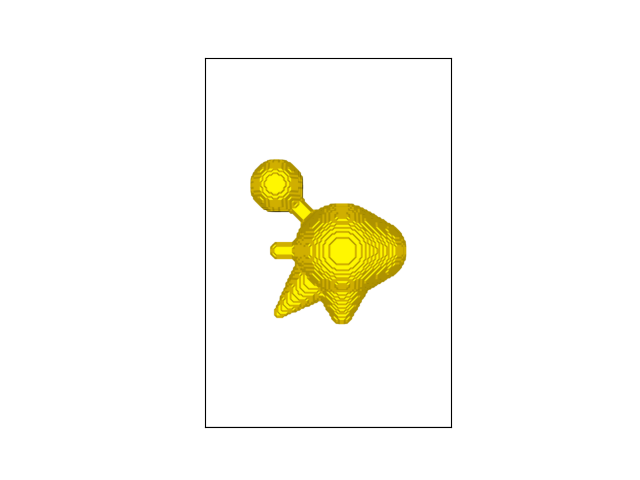

In [3]:
binary_image = branchoid()
surface = nppas.all_labels_to_surface(binary_image)
surface

## Saving surfaces to disk
The [vedo](https://vedo.embl.es/) library functions for saving and loading surfaces meshes. To convert them from/to napari-compatible surface-tuples, we use [napari-process-points-and-surfaces (nppas)](https://github.com/haesleinhuepf/napari-process-points-and-surfaces).

In [5]:
import os

# Path to the directory to be checked
folder_path = './data/'

# Check if the directory exists
if not os.path.exists(folder_path):
    # Create the directory if it does not exist
    os.makedirs(folder_path)

In [6]:
import os

folder_path = './data/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [7]:
mesh = nppas.to_vedo_mesh(surface)

filename = "data/branchoid.ply"

_ = vedo.write(mesh, filename)

## Loading meshes from disk

In [8]:
new_mesh = vedo.load(filename)
new_mesh

<Mesh(0x000001E610249910) at 0x000001E61FA81A60>

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
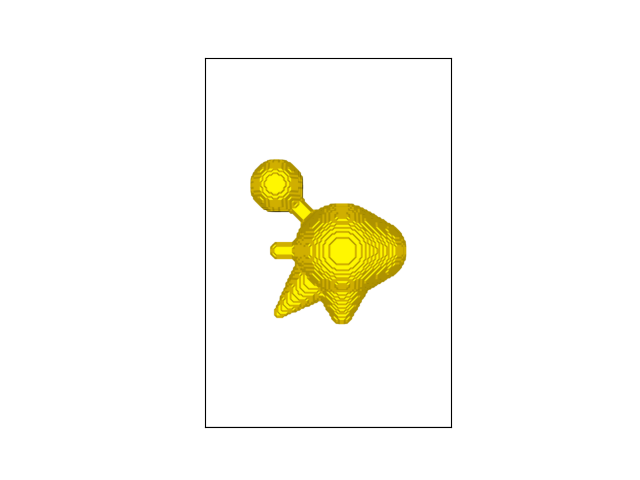

In [9]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface

## Exercise
Load the `skimage.data.cells3d` dataset, extract the nuclei channel and create a surface mesh for every individual nucleus. Store all these surface meshes to disc.

In [37]:
from skimage import data
from pyclesperanto_prototype import imshow
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from skimage.filters import median

cells_3d = data.cells3d()

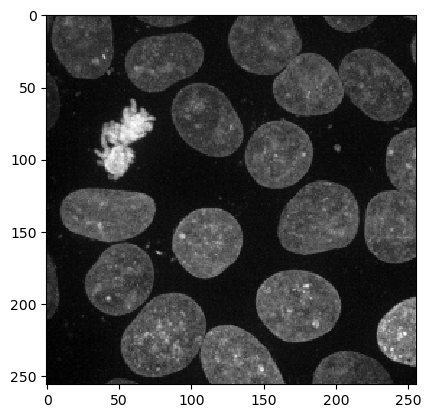

In [17]:
nuclei = cells_3d[:,1,:,:]

imshow(nuclei)

In [29]:
#denoised = nsbatwm.gaussian_blur(nuclei, sigma=3)

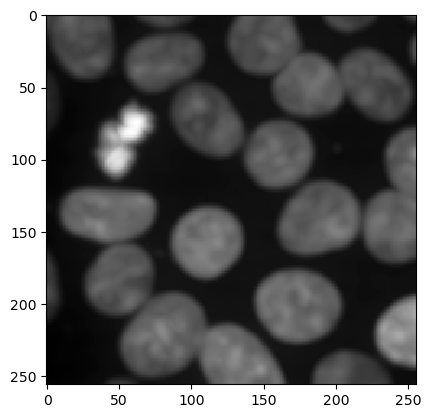

In [30]:
imshow(denoised)

In [47]:
#median = nsbatwm.gaussian_laplace(nuclei)

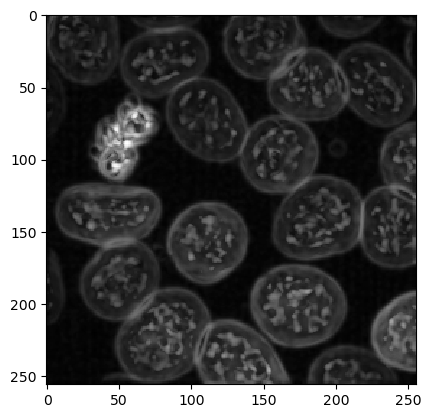

In [48]:
imshow(median)

In [54]:
segmented = nsbatwm.gauss_otsu_labeling(nuclei)

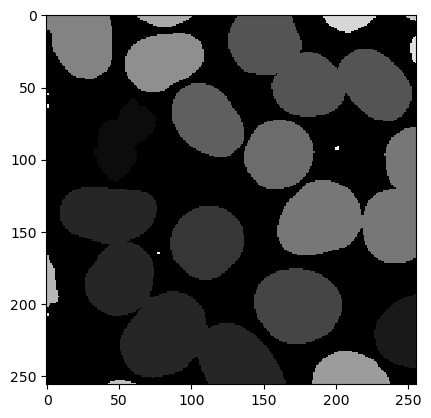

In [55]:
imshow(segmented)

In [56]:
without_border = nsbatwm.remove_labels_on_edges(segmented)

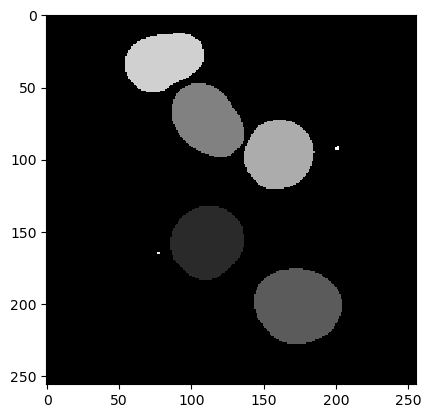

In [57]:
imshow(without_border)

In [58]:
import stackview

stackview.slice(without_border)